# POC QIM descision Tree

-- identifies the classes of interest for the tree


In [0]:
import pandas as pd
import numpy as np
import random 
from ast import literal_eval
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.utils import shuffle

In [114]:
from google.colab import drive
drive.mount('/content/gdrive')
import zipfile
root_path = 'gdrive/My Drive/data_output/TSD/'

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [0]:
## 2000 points
df = pd.read_csv(root_path+"DT_PROTOTYPE/data.csv")
df.head()
df.dropna(inplace=True)


# Process the output data

In [118]:
from sklearn.model_selection import train_test_split

subset = df[['DARKNESS_classes','RAIN_classes', 'MOTIONBLUR_classes', 'BACKLIGHTSUN_classes']]

print(subset['MOTIONBLUR_classes'].unique())
print(subset['DARKNESS_classes'].unique())
print(subset['RAIN_classes'].unique())
print(subset['BACKLIGHTSUN_classes'].unique())


X = subset.values

y = df['VGG_is_correct'].astype(int).values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05, random_state=42)
X_train, y_train = shuffle(X_train, y_train)


data_set = {"data":X_train, 
            "feature_names":['DARKNESS', 'RAIN', 'MOTIONBLUR', 'BACKLIGHTSUN'],
            "target_names":"",
            "target":y_train}
print(len(X_train))
     


[0 2 1]
[0 1 2]
[0 2 1]
[2 0 1]
149


# Generate Classifying Descision Tree 

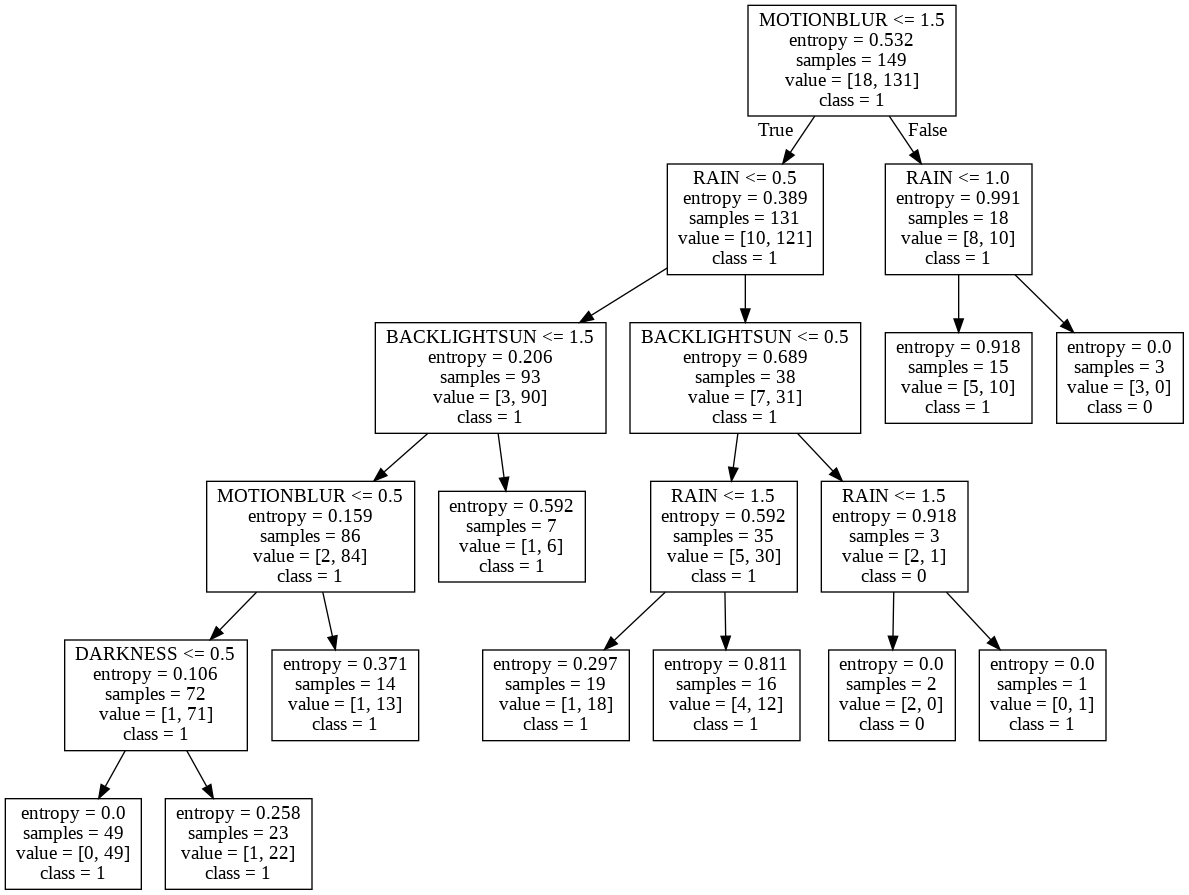

In [119]:
import pydotplus
from sklearn.datasets import load_iris
from sklearn import tree
import numpy
from IPython.display import Image, display
# %pylab inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

class DT:
    def __init__(self, dataset):
        self.dataset = dataset
        #self.class_names = class_names
        self.clf = self.train_model()

    def train_model(self):
        """
        Train decision tree classifier

        :param iris:    iris data set instance
        :return:        classifier instance
        """
        clf = tree.DecisionTreeClassifier("entropy", max_depth=5, max_leaf_nodes=10)
        
        clf = clf.fit(self.dataset['data'], self.dataset['target'])
        
        return clf

    def display_image(self):
        """
        Displays the decision tree image

        :param clf:     classifier instance
        :param iris:    iris data set instance
        """
        dot_data = tree.export_graphviz(self.clf,
                                        feature_names= self.dataset['feature_names'],
                                        class_names=["0","1"],
                                        filled=False, rounded=False)

        graph = pydotplus.graph_from_dot_data(dot_data)
        display(Image(data=graph.create_png()))
        graph.write_pdf(root_path + "/DT_PROTOTYPE/tree.pdf")


if __name__ == '__main__':
    context_data = data_set
    dt = DT(context_data)
    dt.display_image()
    y_pred = dt.clf.predict(X_test)


# Analyse the Results of the DT tree
-- find Entropy (information gain splits)
-- use prediction to make a table of the predictions 

In [102]:
from tabulate import tabulate

#print(dt.clf.tree_.__getstate__()['nodes'])
#print("Model Accuracy: %.2f" % (accuracy_score(y_test,y_pred)*100), "%")


#@todo: need to replace the lookup table with more values
#lookup_table = pd.read_csv(root_path+"DT_PROTOTYPE/LookupValues.csv")

lst_of_lsts = []

for i in range(0,3):
    #print("DARKNESS {}".format(i))
    for j in range(0,3):
        #print("RAIN {}".format(j))
        for k in range(0,3):
            value = (dt.clf.predict_proba([[i,j,k]]))
            lst_of_lsts.append([[i,j,k], value, numpy.amax(value)])

lst_of_lsts.sort(key=lambda x: x[2], reverse=True)
print (tabulate(lst_of_lsts, headers=['Value', 'Percentage [0,1]', 'Probability of correct outcome']))
           
           

Value      Percentage [0,1]             Probability of correct outcome
---------  -------------------------  --------------------------------
[0, 0, 0]  [[0.01272265 0.98727735]]                          0.987277
[1, 0, 0]  [[0.01272265 0.98727735]]                          0.987277
[0, 0, 1]  [[0.07092199 0.92907801]]                          0.929078
[1, 0, 1]  [[0.07092199 0.92907801]]                          0.929078
[0, 1, 0]  [[0.08181818 0.91818182]]                          0.918182
[1, 1, 0]  [[0.08181818 0.91818182]]                          0.918182
[2, 1, 0]  [[0.08181818 0.91818182]]                          0.918182
[2, 0, 0]  [[0.14220183 0.85779817]]                          0.857798
[2, 0, 1]  [[0.14220183 0.85779817]]                          0.857798
[1, 2, 0]  [[0.17647059 0.82352941]]                          0.823529
[1, 2, 1]  [[0.17647059 0.82352941]]                          0.823529
[2, 2, 0]  [[0.17647059 0.82352941]]                          0.823529
[2, 2,

In [0]:
#visualize_classifier(dt.clf, X_train, y_train)

In [0]:
from sklearn.tree import _tree

In [73]:
clf = tree.DecisionTreeClassifier("entropy", max_depth=5)
clf = clf.fit(context_data['data'], context_data['target'])

from sklearn.ensemble import AdaBoostClassifier
ada = AdaBoostClassifier()
ada.fit(X_train, y_train)

from IPython.display import Image
from sklearn.externals.six import StringIO
from sklearn.tree import export_graphviz
import pydot

print(len(ada.estimators_))
sub_tree = ada.estimators_
print(ada.predict([[2,2,2]]))
dot_data = StringIO()
export_graphviz(sub_tree, out_file=dot_data,feature_names=context_data['feature_names'])
graph = pydot.graph_from_dot_data(dot_data.getvalue())  
Image(graph[0].create_png())


50
[0]


TypeError: ignored

In [56]:
#from StringIO import StringIO
out = StringIO()
out = tree.export_graphviz(clf, out_file=out)
print (out.getvalue())

AttributeError: ignored

In [0]:
from StringIO import StringIO
out = StringIO()
out = tree.export_graphviz(clf, out_file=out)
print out.getvalue()